## Import Libraries

In [1]:
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import bootstrap_contrast as bsc

import espresso as esp

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Create Espresso Instances

In [2]:
data_folder='/Users/josesho/bin/git-repos/espresso/data'

starved_choice_folder=os.path.join(data_folder,'24-Hrs-starved-choice')
mb312b_folder=os.path.join(data_folder,'by_genotype/MB312B')
mb213b_folder=os.path.join(data_folder,'by_genotype/MB213B')

starved_choice=esp.espresso(starved_choice_folder)
mb312b=esp.espresso(mb312b_folder)
mb213b=esp.espresso(mb213b_folder)

## Plot Testing

Coloring feed volume time course by Genotype
Grouping feed volume time course by FoodChoice


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a14a240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a8dfc18>], dtype=object)

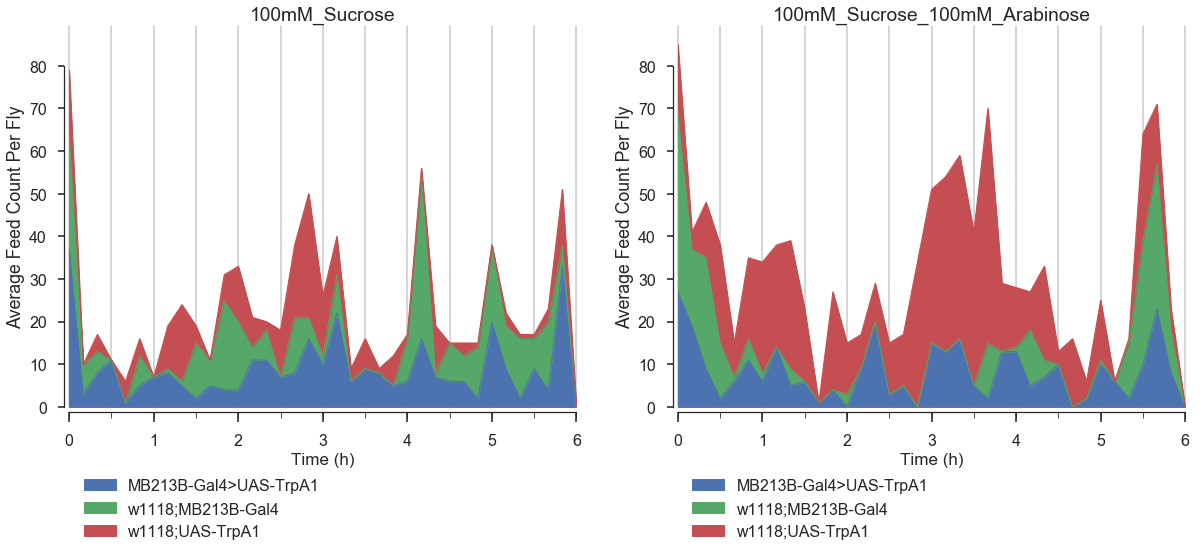

In [68]:
mb213b.plot.timecourse.feed_count(group_by='FoodChoice',color_by='Genotype')

Coloring feed volume time course by FoodChoice
Grouping feed volume time course by Genotype


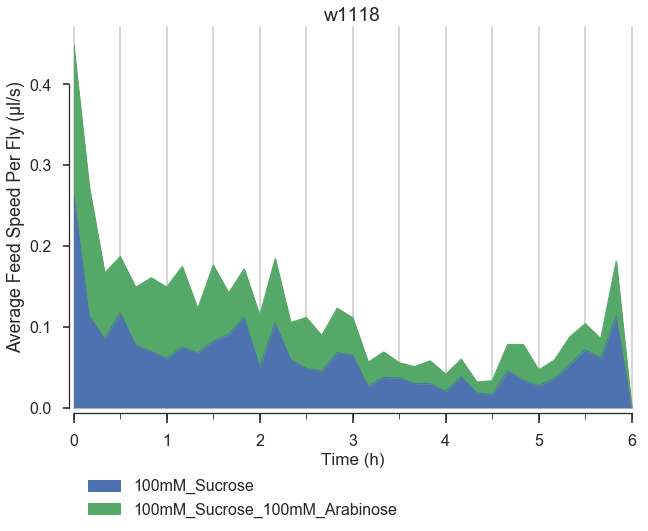

In [6]:
starved_choice.plot.timecourse.feed_speed()

## Used for Development

In [6]:
mb312b

4 feedlogs with a total of 120 flies.
3 genotypes ['w1118;MB312B-Gal4' 'MB312B-Gal4>UAS-TrpA1' 'w1118;UAS-TrpA1'].
2 temperatures [22 29].
2 foodtypes ['100mM_Sucrose' '100mM_Sucrose_100mM_Arabinose'].

In [7]:
df=mb312b.feeds.copy()

group_by='FoodChoice'
color_by='Genotype'
resample_by='10min'

yvar='Cumulative Feed Count'

In [140]:
df=mb213b.feeds.copy()
group_by='FoodChoice'
color_by='Genotype'
resample_by='10min'

if df.RelativeTime_s.dtype=='float64':
    df.loc[:,'RelativeTime_s']=pd.to_datetime(df['RelativeTime_s'],unit='s')
    
a=df.groupby(['Temperature','Genotype','FlyID','FoodChoice'])\
               .resample(resample_by,on='RelativeTime_s')\
               .sum()
#### ABOVE IS KOSHER; NO NEED TO TWEAK ####

# convert to single index DataFrame, select (and make) columns we need.
csum=pd.DataFrame( a.to_records() )
csum=csum[['Temperature','Genotype','FlyID','FoodChoice',
           'RelativeTime_s',
             ### Below, add all the columns that are
             ### potentially used for cumulative plotting.
             'AverageFeedVolumePerFly_µl',
             'AverageFeedCountPerFly']]
csum=esp._munger.__add_time_column(csum)

### WORK IN PROGRESS ###
csum=csum.pivot_table(index='time_s',
                        columns=['Temperature','Genotype','FoodChoice','FlyID'],
                        values=yvar)
csum=csum.cumsum().fillna(method='pad').fillna(0)




csum

Temperature                        22                            \
Genotype        MB213B-Gal4>UAS-TrpA1                             
FoodChoice              100mM_Sucrose                             
FlyID       2017-02-24_12-05-01_Fly13 2017-02-24_12-05-01_Fly14   
time_s                                                            
0                                 3.0                       0.0   
600                               3.0                       0.0   
1200                              3.0                       0.0   
1800                              3.0                       0.0   
2400                              3.0                       0.0   
3000                              3.0                       0.0   
3600                              3.0                       0.0   
4200                              3.0                       0.0   
4800                              3.0                       0.0   
5400                              3.0                       0.0   
6000                              3.0                       0.0   
6600                              3.0                       3.0   
7200                              3.0                       3.0   
7800                              3.0                       3.0   
8400                              3.0                       3.0   
9000                             10.0                       3.0   
9600                             10.0                       3.0   
10200                            10.0                      16.0   
10800                            10.0                      16.0   
11400                            10.0                      16.0   
12000                            10.0                      16.0   
12600                            10.0                      17.0   
13200                            10.0                      17.0   
13800                            10.0                      17.0   
14400                            10.0                      17.0   
15000                            10.0                      17.0   
15600                            10.0                      17.0   
16200                            10.0                      17.0   
16800                            10.0                      17.0   
17400                            10.0                      17.0   
18000                            10.0                      17.0   
18600                            10.0                      17.0   
19200                            10.0                      17.0   
19800                            10.0                      17.0   
20400                            10.0                      17.0   
21000                            10.0                      17.0   
21600                            10.0                      17.0   

Temperature                                                      \
Genotype                                                          
FoodChoice                                                        
FlyID       2017-02-24_12-05-01_Fly15 2017-02-24_12-05-01_Fly16   
time_s                                                            
0                                 1.0                       1.0   
600                               1.0                       1.0   
1200                              1.0                       1.0   
1800                              1.0                       1.0   
2400                              1.0                       1.0   
3000                              1.0                       1.0   
3600                              1.0                       1.0   
4200                              1.0                       1.0   
4800                              1.0                       1.0   
5400                              1.0                       1.0   
6000                              1.0                       1.0   
6600                              1.0                       1.0   
7200                              1.0         

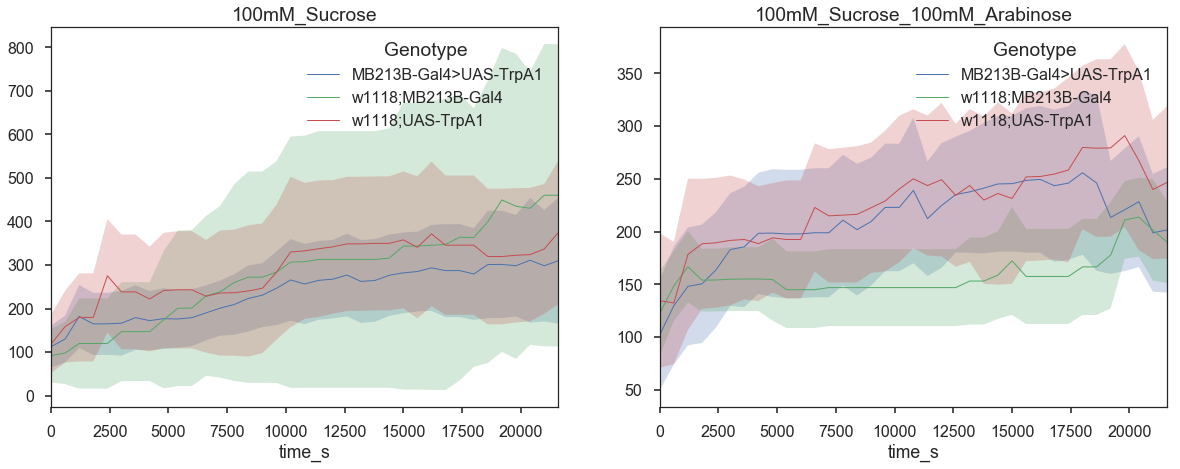

In [61]:
##### CUMULATIVE PLOT.

# plotdat=pd.DataFrame(a.to_records())
plotdat=b.copy()

yvar='Cumulative Feed Count'
yvar='Cumulative Volume (nl)'

sns.set(style='ticks',context='poster')
groupby_grps=np.sort( plotdat[group_by].unique() )
num_plots=int( len(groupby_grps) )

x_inches=10*num_plots
y_inches=7
    
fig,axx=plt.subplots(nrows=1,
                      ncols=num_plots,
                      figsize=(x_inches,y_inches),
                      gridspec_kw={'wspace':0.2} )

# Loop through each panel.
for c, grp in enumerate( groupby_grps ):
    if len(groupby_grps)>1:
        plotax=axx[c]
    else:
        plotax=axx
        
    ## Filter plotdf according to group_by.
    temp_plotdf=plotdat[plotdat[group_by]==grp]

    ### and make cumulative plot.
    temp_plotdf_groupby = temp_plotdf.groupby([color_by,'time_s'])
    temp_plotdf_mean = temp_plotdf_groupby.mean().unstack()[yvar].T
    temp_plotdf_mean.plot(ax=plotax,lw=1)

    temp_plotdf_halfci = temp_plotdf_groupby.sem().unstack()[yvar].T*1.96
    lower_ci = temp_plotdf_mean-temp_plotdf_halfci
    upper_ci = temp_plotdf_mean+temp_plotdf_halfci
    
    for c in temp_plotdf_mean.columns:
        plotax.fill_between(temp_plotdf_mean.index,
                         lower_ci[c],upper_ci[c],
                           alpha=0.25)
    plotax.set_title(grp)